In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
tf.__version__



'2.3.0'

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [4]:
example = ds_train.take(5)
example

<TakeDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

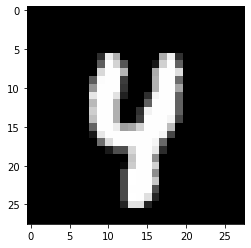

Label: 4


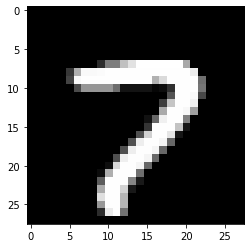

Label: 7


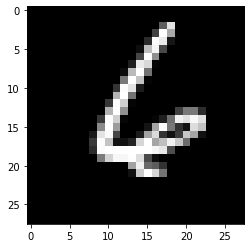

Label: 6


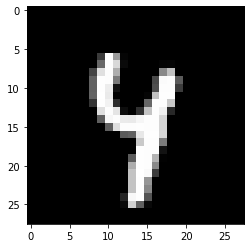

Label: 4


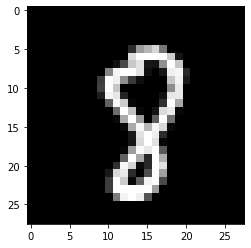

Label: 8


In [5]:
for sample in example:
    image, label = sample[0].numpy(), sample[1].numpy()
    plt.imshow(image[:, :, 0].astype(np.uint8), cmap=plt.get_cmap("gray"))
    plt.show()
    print("Label: %d" % label)

In [6]:
tf.random.uniform((6,8), maxval=2,dtype='int32')

<tf.Tensor: shape=(6, 8), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0]])>

In [7]:
def make_image_sparse(image, label, sparicty=.7):
    ones = np.ones(shape=image.shape)
    indices = np.random.choice(np.arange(ones.shape[0]*ones.shape[1]*ones.shape[2]), replace=False,
                           size=int(ones.shape[0]*ones.shape[1]*ones.shape[2] * sparicty))

    # sparse = tf.random.uniform(shape=image.shape, minval=0, maxval=2,dtype='int32')
    # sparse = tf.cast(sparse, tf.float32)
    ones[np.unravel_index(indices, ones.shape)] = 0
    sparse = tf.constant(ones, dtype=tf.float32)
    new_image = image * sparse
    return new_image, label
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


In [8]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.map(make_image_sparse, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [9]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_test = ds_test.map(make_image_sparse, num_parallel_calls=tf.data.experimental.AUTOTUNE)

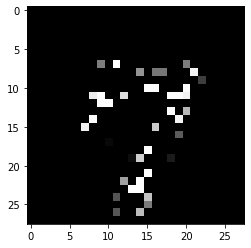

Label: 7


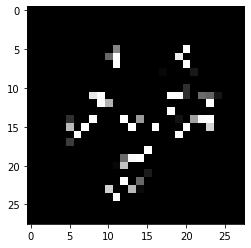

Label: 4


In [10]:
example_sparse = ds_train.take(2)
for sample in example_sparse:
    image, label = sample[0].numpy()*255, sample[1].numpy()
    plt.imshow(image[:, :, 0].astype(np.uint8), cmap=plt.get_cmap("gray"))
    plt.show()
    print("Label: %d" % label)

In [11]:

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [12]:
# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=3,
    input_shape=( 28, 28, 1),
    activation="relu"
    ),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/5
469/469 [==============================] - 13s 28ms/step - loss: 0.6557 - sparse_categorical_accuracy: 0.7932 - val_loss: 0.5730 - val_sparse_categorical_accuracy: 0.8529
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2693 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.3354 - val_sparse_categorical_accuracy: 0.9137
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2101 - sparse_categorical_accuracy: 0.9355 - val_loss: 0.2669 - val_sparse_categorical_accuracy: 0.9274
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1822 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.2818 - val_sparse_categorical_accuracy: 0.9200
Epoch 5/5
469/469 [==============================] - 13s 29ms/step - loss: 0.1662 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.2053 - val_sparse_categorical_accuracy: 0.9392


In [14]:
model.evaluate(ds_test )

79/79 [==============================] - 1s 6ms/step - loss: 0.2053 - sparse_categorical_accuracy: 0.9392


[0.20529262721538544, 0.9391999840736389]

In [15]:
ds_test

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>